<a href="https://colab.research.google.com/github/journey-Ji/Python-DeepLearning/blob/main/Iris_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

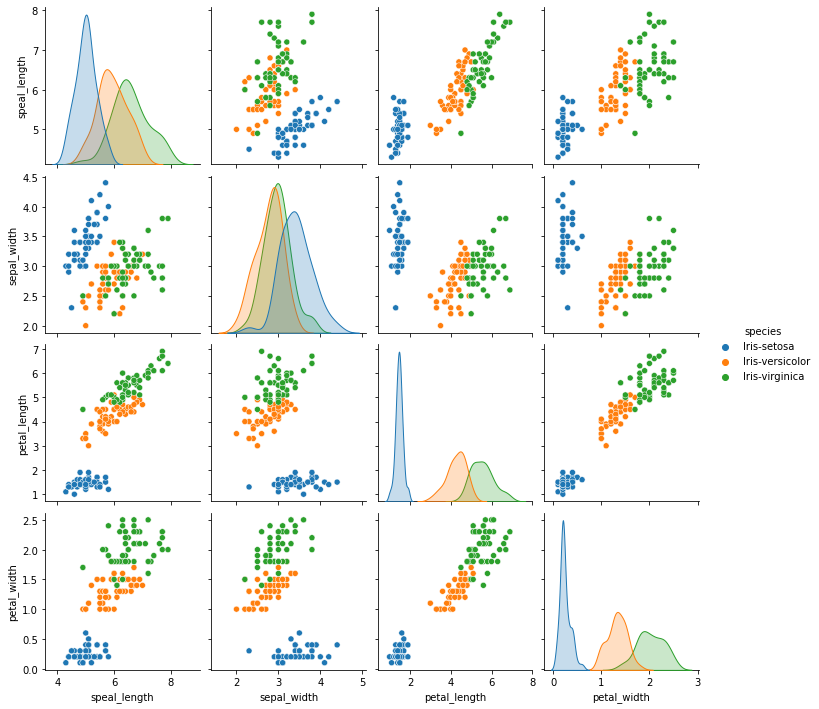

Epoch 1/50
150/150 [==============================] - 0s 905us/step - loss: 1.6167 - accuracy: 0.3221
Epoch 2/50
150/150 [==============================] - 0s 903us/step - loss: 0.9050 - accuracy: 0.4977
Epoch 3/50
150/150 [==============================] - 0s 911us/step - loss: 0.7321 - accuracy: 0.6970
Epoch 4/50
150/150 [==============================] - 0s 892us/step - loss: 0.6164 - accuracy: 0.7308
Epoch 5/50
150/150 [==============================] - 0s 932us/step - loss: 0.5534 - accuracy: 0.7866
Epoch 6/50
150/150 [==============================] - 0s 876us/step - loss: 0.5216 - accuracy: 0.9213
Epoch 7/50
150/150 [==============================] - 0s 925us/step - loss: 0.4361 - accuracy: 0.9625
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.8350
Epoch 9/50
150/150 [==============================] - 0s 931us/step - loss: 0.3923 - accuracy: 0.8978
Epoch 10/50
150/150 [==============================] - 0s 922us/step - loss: 0.3683 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)


df = pd.read_csv('iris.csv', names = ["speal_length",
                                      "sepal_width",
                                      "petal_length",
                                      "petal_width",
                                      "species"])

#그래프 확인
sns.pairplot(df,hue='species')
plt.show()

#데이터분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]


#문자열을 숫자로 변환

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

#모델 설정
model = Sequential()
model.add(Dense(16,input_dim=4,activation='relu'))
model.add(Dense(3,activation="softmax"))

#모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


#모델실행
model.fit(X,Y_encoded,epochs=50,batch_size=1)

#출력
print("\n Accuracy:%.4f"%(model.evaluate(X,Y_encoded)[1]))